# Step27, 테일러 급수 미분 

## 27.1 sin 함수 구현 

$$y = sin(x) 일때, \frac{\partial z}{\partial x} = cos(x)$$


In [1]:
import numpy as np 
from dezero import Function 

class Sin(Function):
    def forward(self,x):
        y = np.sin(x)
        return y 

    def backward(self,gy):
        x = self.inputs[0].data 
        gx = gy * np.cos(x)
        return gx 
    
def sin(x):
    return Sin()(x)

In [5]:
# sin값과 cos값이 같아지는 pi/4를 넣어본다.
from dezero import Variable 

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)
# sin(x)의 값과 미분값이 같다 

0.7071067811865476
0.7071067811865476


## 27.2 테일러 급수 이론 

sin 함수의 미분을 테일러 급수를 이용한 방법으로 계산해본다.  
테일러 급수란 어떤 함수를 다항식으로 근사하는 방법이다.


점 a에서 f(x)의 테일러 급수  
$f(x) = f(a) + f'(a)(x-a) + \frac{1}{2!}f''(a)(x-a)^2 + \frac{1}{3!}f'''(a)(x-a)^3 + ....$
항이 많아 질수록 근사의 정확도가 높아진다.

a = 0일 때의 테일러 급수를 **매클로린 전개**라고 한다.


f(x) = sin(x) 이면 $f'(x)=cos(x), f''(x)=-sin(x), f'''(x) = -cos(x), f''''(x) = sin(x), ...$

$sin(0) = 0, cos(0) = 1$

$sin(x) = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - ..... = \sum_{i=0}^{\infty} (-1)^i\frac{x^{2i+1}}{(2i+1)!}$


## 27.3 테일러 급수 구현 

In [31]:
import math 

def my_sin(x, threshold=0.001):
    y=0
    for i in range(100000):
        c = (-1)**i / math.factorial(2*i + 1)
        t = c * x**(2*i + 1)
        y = y + t 
        if abs(t.data) < threshold:
            break
    
    return y 

In [32]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward() 

print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


## 27.4 계산 그래프 시각화 

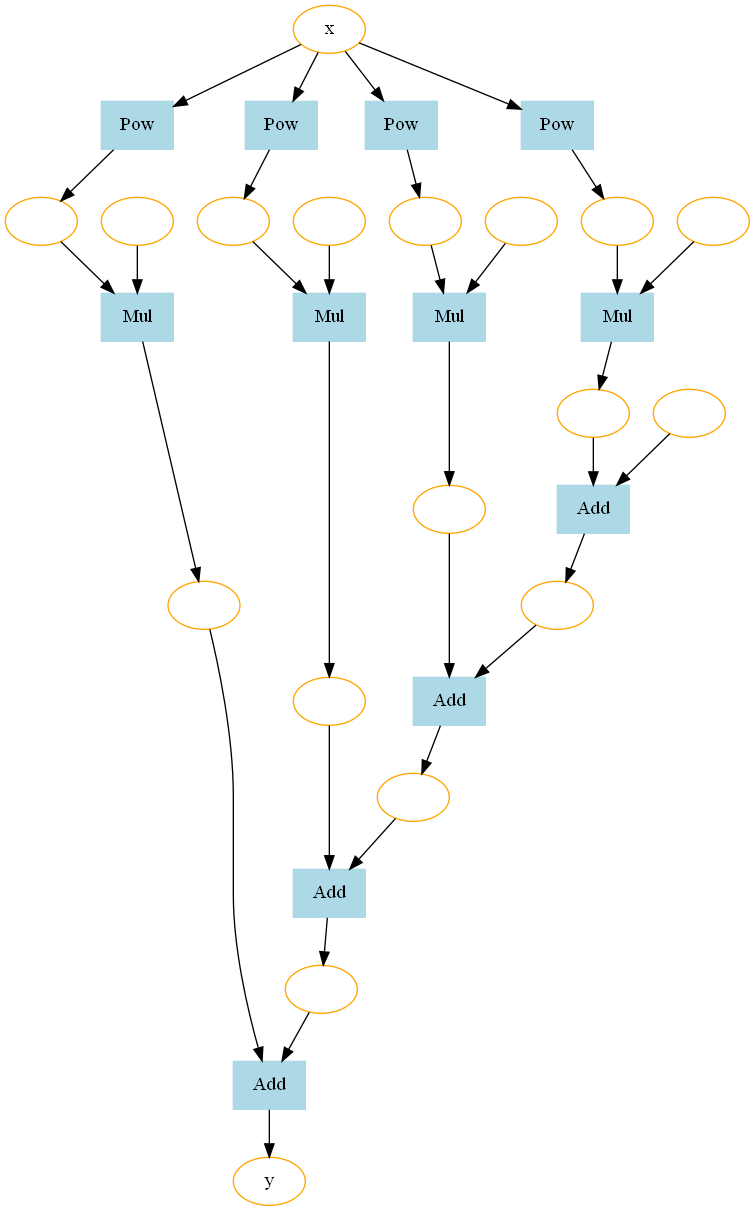

In [33]:
import numpy as np 
from dezero import Variable
from dezero.utils import plot_dot_graph
import math

x = Variable(np.array(1.0))
y = my_sin(x)
y.backward() 

x.name = 'x'
y.name = 'y'

plot_dot_graph(y, verbose=False, to_file='goldstein5.png')